In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Treeb\Instacart Basket Analysis 11-20-2023'

In [3]:
df_opc_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
df_opc_merge.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2398795       1             2                   3                  7   
2    473747       1             3                   3                 12   
3   2254736       1             4                   4                  7   
4    431534       1             5                   4                 15   

   days_since_users_last_order  product_id  add_to_cart_order  reordered  \
0                          NaN         196                  1          0   
1                         15.0         196                  1          1   
2                         21.0         196                  1          1   
3                         29.0         196                  1          1   
4                         28.0         196                  1          1   

  _merge  ...         frequency_flag  First Name  Last Name  Gender    State  \
0   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
1   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
2   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
3   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
4   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   

  Age date_joined number_of_dependants  Marital_Status income  
0  31   2/17/2019                    3         married  40423  
1  31   2/17/2019                    3         married  40423  
2  31   2/17/2019                    3         married  40423  
3  31   2/17/2019                    3         married  40423  
4  31   2/17/2019                    3         married  40423  

[5 rows x 33 columns]

 Create a bar chart, a histogram, a scatterplot, and a line chart from a sample set. 

### Randomized Subsets

In [5]:
np.random.seed(5)

In [6]:
tf_array = np.random.rand(len(df_opc_merge)) <= 0.7

In [7]:
big = df_opc_merge[tf_array]

In [7]:
small = df_opc_merge[~tf_array]

In [9]:
len(df_opc_merge) * 0.3

9721457.7

In [8]:
len(small)

9721931

### Histogram

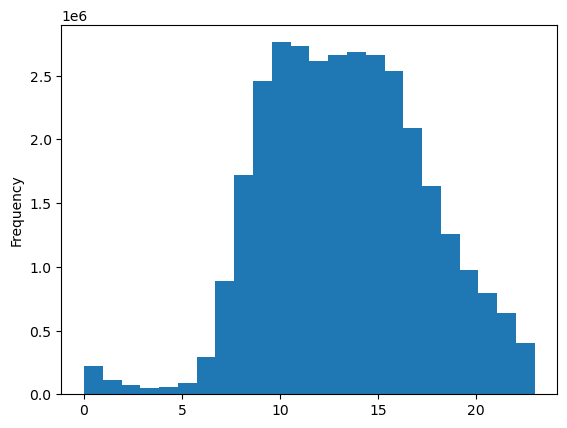

In [9]:
hist = df_opc_merge['order_hour_of_day'].plot.hist(bins = 24)

In [10]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_day_hist.png'))

This histogram shows that most of the orders take place during the day, the majority of them taking place between 9 am and 4 pm. The least amount of orders come in between midnight and 6 am. 

### Loyalty_flag Bar Chart

In [11]:
df_opc_merge.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2398795       1             2                   3                  7   
2    473747       1             3                   3                 12   
3   2254736       1             4                   4                  7   
4    431534       1             5                   4                 15   

   days_since_users_last_order  product_id  add_to_cart_order  reordered  \
0                          NaN         196                  1          0   
1                         15.0         196                  1          1   
2                         21.0         196                  1          1   
3                         29.0         196                  1          1   
4                         28.0         196                  1          1   

  _merge  ...         frequency_flag  First Name  Last Name  Gender    State  \
0   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
1   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
2   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
3   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   
4   both  ...  Non-Frequent customer       Linda     Nguyen  Female  Alabama   

  Age date_joined number_of_dependants  Marital_Status income  
0  31   2/17/2019                    3         married  40423  
1  31   2/17/2019                    3         married  40423  
2  31   2/17/2019                    3         married  40423  
3  31   2/17/2019                    3         married  40423  
4  31   2/17/2019                    3         married  40423  

[5 rows x 33 columns]

In [12]:
df_opc_merge.shape

(32404859, 33)

In [13]:
df_opc_merge['loyalty_flag']

0               New customer
1               New customer
2               New customer
3               New customer
4               New customer
                  ...       
32404854    Regular customer
32404855        New customer
32404856        New customer
32404857        New customer
32404858        New customer
Name: loyalty_flag, Length: 32404859, dtype: object

In [14]:
df_opc_merge.loyalty_flag.unique()

array(['New customer', 'Regular customer', 'Loyal customer'], dtype=object)

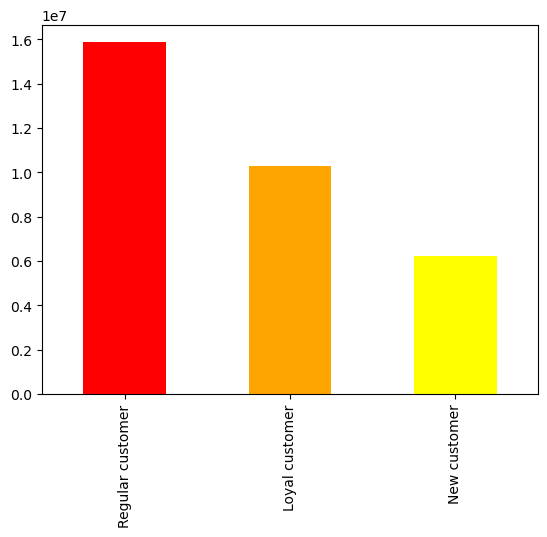

In [17]:
bar = df_opc_merge['loyalty_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow'])

This is a nice simple graph showing the number of different customers compared to each other. We see we have the most regular customers at about 1.6 x 10^7 people, the second most loyal customers at about 1 x 10^7, followed by new customers at 0.6 x 10^7 people. We could use this loyalty flag to divide customers into groups and observe their characteristics, such as their demographic characteristics, and this could help us with targeted advertising. For example, if we wanted to try to bring in more new customers, we might look at our group of current new customers and see if they have anything in common. If we wanted to reward our loyal customers, we could look at their demographic characteristics as well and see what kind of discounts they might appreciate most. 

In [18]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

### Line Graph

#### Use only 30% of the data and only the necessary columns to form this line graph

In [19]:
sample_30 = small[['order_hour_of_day', 'prices']]

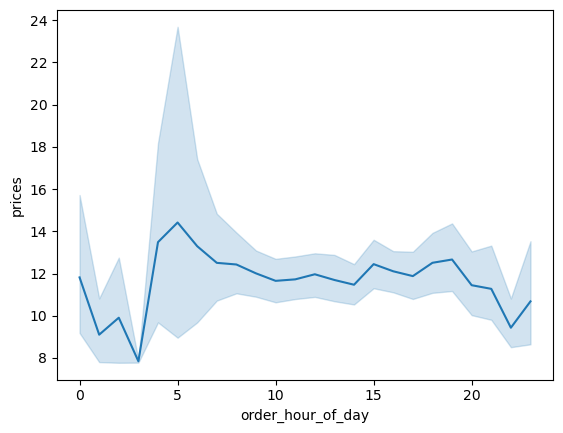

In [20]:
line = sns.lineplot(data = sample_30, x = 'order_hour_of_day',y = 'prices')

This line graph shows the average price of products people buy versus the hour of the day. The first thing I notice in this graph is the giant spike at 5 AM. The actual line has a spike, showing an average of around 14 for the price of products at that time of day. The remarkable thing is the confidence interval spike, going all the way up to about 24 usd per product sometimes. Looking at this, I would say we need to target expensive merchandize advertisements for around 5 AM, or between 3 and 7 AM. 

In [21]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_during_the_day.png'))

### Marketing line chart: Demographics

#### Use 30% of the data and only the necessary columns as the data source

In [10]:
sample_30_2 = small[['Age', 'number_of_dependants']]

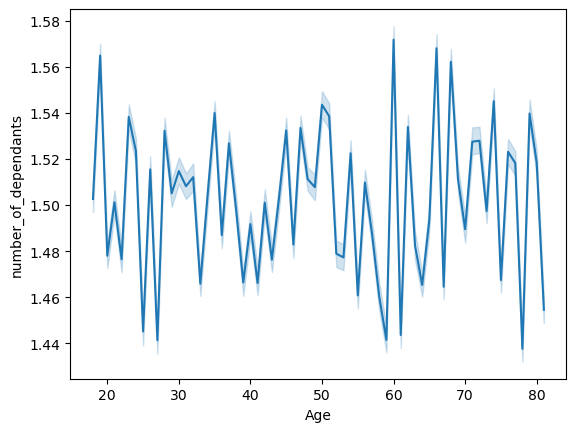

In [11]:
line_2 = sns.lineplot(data = sample_30_2, x = 'Age', y = 'number_of_dependants')

People younger than 30 and older than 50 seem to have a wider variety of number of dependants from 1.44 to 1.58. People between 30 and 50 have a narrrower variety between 1.46 and 1.54. This doesn't seem to be a big difference to me, except that people bewteen 30 and 50 are more likely to have a solid 1.5 dependants. If I were to make any marketable insights, it seems that people around 50 years old are more likely to reliably have greater than 1.5 dependants, so people around that age should be targeted for relevant advertising.

In [35]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'deps_vs_age.png'))

### Scatter Plot

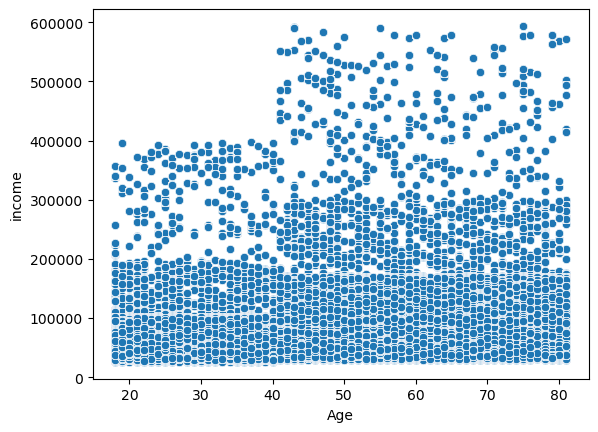

In [34]:
scatter = sns.scatterplot(x = 'Age', y = 'income',data = df_opc_merge)

In [36]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income.png'))

The Scatterplot above shows a very understandable trend, in that most customers make less than 200,000 usd per year. It also shows a very abrupt and surprising trend. Everyone under the age of 40 apparently makes 400,000 usd per year or less, while everyone over 40 makes anywhere between 0 and 600,000 usd. Even people that are over 70 and 80 (way over retirement age) seem to make relatively the same amount as people between 40 and 50 years of age. This graph is not what I expected at all. Number one, the income levels seem amazingly high. I'm surprised to see so many high income levels. Number two, I'm surprised the number of high income levels doesn't lower a bit after retirement age.   

### Adding log function to line plot

In [16]:
import math

In [ ]:
sample_30_2 = small[['Age', 'number_of_dependants']]

In [20]:
sample_30_2['Age'].dtype

dtype('int64')

In [21]:

x_log = np.log(sample_30_2['Age'])

In [23]:
y_log = np.log(sample_30_2['number_of_dependants'])

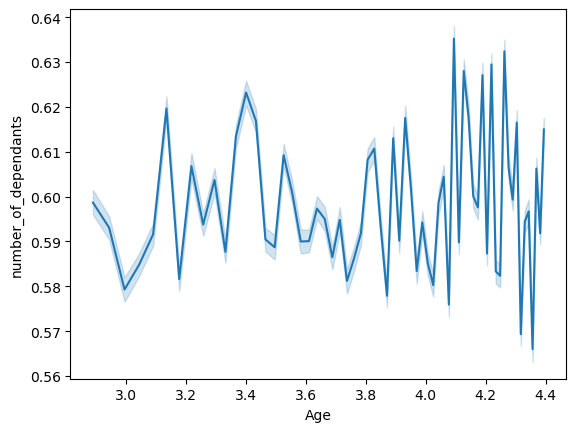

In [24]:
line_3 = sns.lineplot(data = sample_30_2, x = x_log, y = y_log)

Above is a logarithmic graph of the original line chart, number of dependants versus age. I wanted to try putting this on a log-log plot to see if this would smooth out the chart a bit. Unfortunately, it still looks very jaggedy. 

In [25]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'deps_vs_age_loglogplot.png'))

### Log scatter plot

In [26]:
x_log_scat = np.log(df_opc_merge['Age'])

In [27]:
y_log_scat = np.log(df_opc_merge['income'])

MemoryError: Unable to allocate 494. MiB for an array with shape (32404859, 2) and data type float64

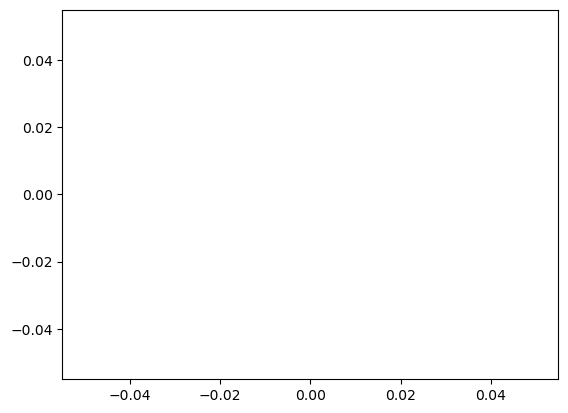

In [28]:
scatter_log = sns.scatterplot(x = x_log_scat, y = y_log_scat)

There is a memory issue when I try to make a logarithmic age vs income graph. So, I will make another randomized sample database and try again.

In [8]:
sample_30_3 = small[['Age', 'income']]

In [9]:
x_log_scat = np.log(sample_30_3['Age'])

In [10]:
y_log_scat = np.log(sample_30_3['income'])

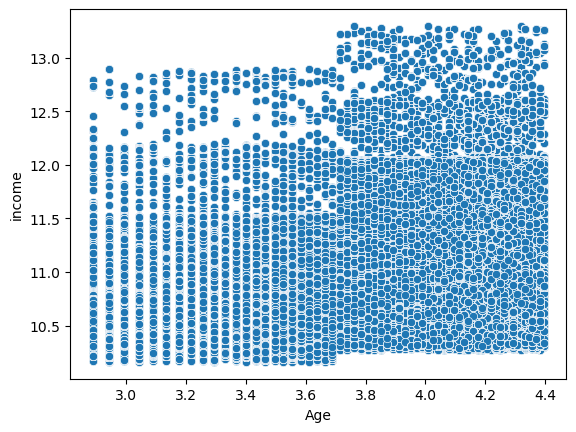

In [11]:
scatter_log = sns.scatterplot(x = np.log(sample_30_3['Age']), y = np.log(sample_30_3['income']), data = sample_30_3)

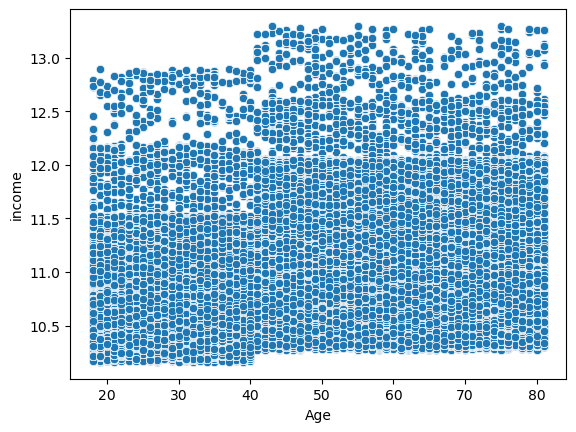

In [12]:
scatter_log_2 = sns.scatterplot(x = 'Age', y = np.log(sample_30_3['income']), data = sample_30_3)

There doesn't appear to be a big difference between this graph and the original scatterplot except for one thing: There is a gap at the bottom of points after the age of 40 that doesn't appear in the non-log version. There may be a difference in how incomes are calculated/recorded in customers over/under 40. This could be important to know.

In [13]:
scatter_log_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_vs_age_logplot.png'))